In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv('/shopping_behavior_updated (1).csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
data.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly
96,97,32,Male,Gloves,Accessories,73,Delaware,S,Gold,Spring,3.6,Yes,Express,Yes,Yes,43,Venmo,Every 3 Months
97,98,21,Male,Shoes,Footwear,92,Virginia,M,Teal,Winter,4.8,Yes,Store Pickup,Yes,Yes,37,Cash,Annually
98,99,20,Male,Jeans,Clothing,67,New York,XL,Teal,Spring,2.6,Yes,Next Day Air,Yes,Yes,20,Bank Transfer,Annually
99,100,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
data.shape

(100, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             100 non-null    int64  
 1   Age                     100 non-null    int64  
 2   Gender                  100 non-null    object 
 3   Item Purchased          100 non-null    object 
 4   Category                100 non-null    object 
 5   Purchase Amount (USD)   100 non-null    int64  
 6   Location                100 non-null    object 
 7   Size                    100 non-null    object 
 8   Color                   100 non-null    object 
 9   Season                  100 non-null    object 
 10  Review Rating           100 non-null    float64
 11  Subscription Status     100 non-null    object 
 12  Shipping Type           100 non-null    object 
 13  Discount Applied        100 non-null    object 
 14  Promo Code Used         100 non-null    obj

In [ ]:
data['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,43.520000,58.360000,3.865000,28.93000
std,29.011492,15.434109,23.904068,0.746896,14.10298
min,1.000000,18.000000,20.000000,2.600000,2.00000
25%,25.750000,31.000000,37.000000,3.175000,17.00000
50%,50.500000,45.500000,54.500000,4.050000,31.50000
75%,75.250000,55.250000,79.000000,4.600000,42.25000
max,100.000000,70.000000,100.000000,5.000000,50.00000


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
mean=int(data["Review Rating"].mean())
print(mean)

NameError: name 'data' is not defined

- average rating = 3

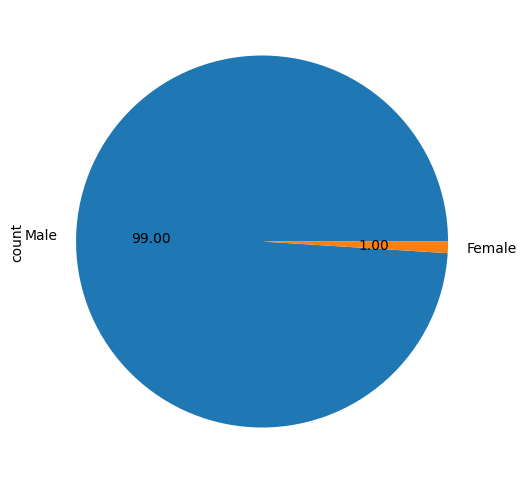

In [ ]:
# Gender Distribution Pie Chart

plt.figure(figsize=(6,8))
data['Gender'].value_counts().plot.pie(autopct='%.2f')
plt.show()

- Male gender dominates the purchases

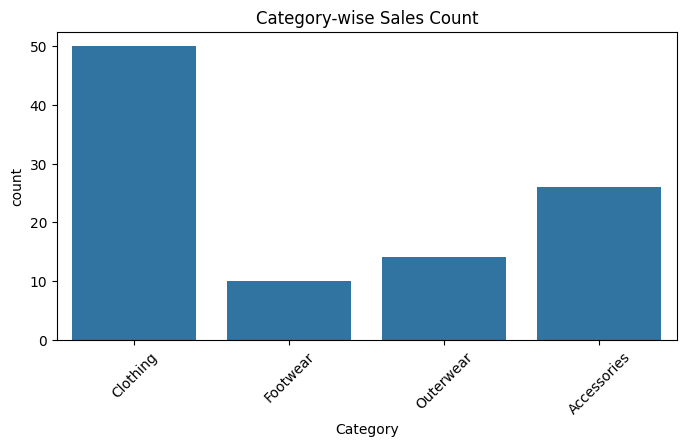

In [ ]:
# Category-wise Sales bar chart

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Category')
plt.xticks(rotation=45)
plt.title("Category-wise Sales Count")
plt.show()


- Clothing have the highest sales

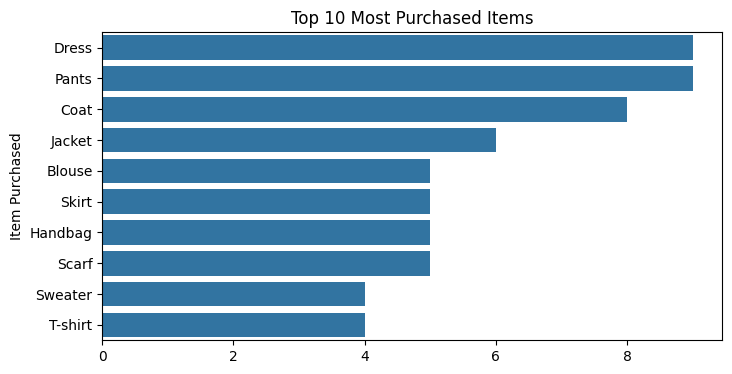

In [ ]:
# Item Purchased (Top 10) Bar Chart

top_items = data['Item Purchased'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Most Purchased Items")
plt.show()


- Most purchased items are Dress, Pants and Coat

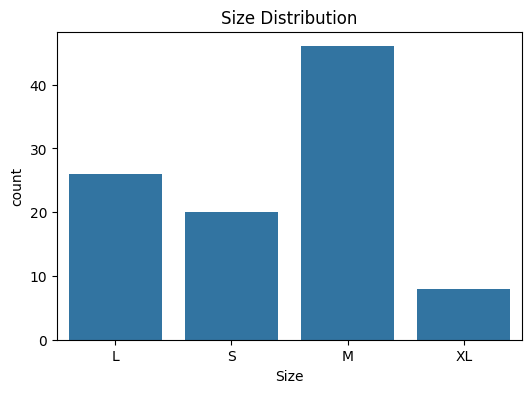

In [ ]:
# Size Distribution Bar Chart

plt.figure(figsize=(6,4))
sns.countplot(x=data['Size'])
plt.title("Size Distribution")
plt.show()


people bought cloths more of M sizes

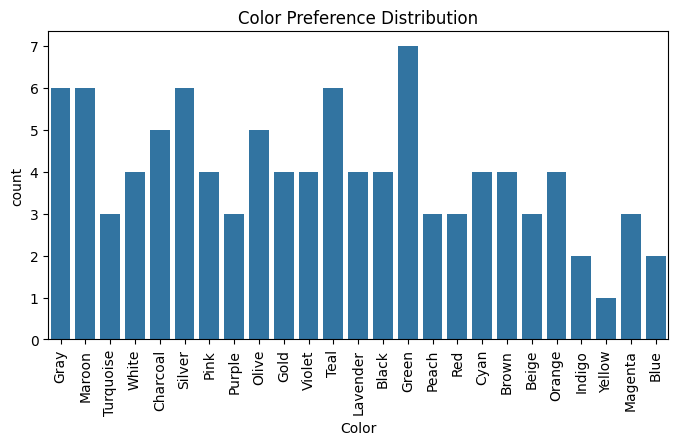

In [ ]:
# Color Distribution Bar chart

plt.figure(figsize=(8,4))
sns.countplot(x=data['Color'])
plt.xticks(rotation=90)
plt.title("Color Preference Distribution")
plt.show()


poeple mostly bought cloths of Green color then of gray, maroon, silver, teal.

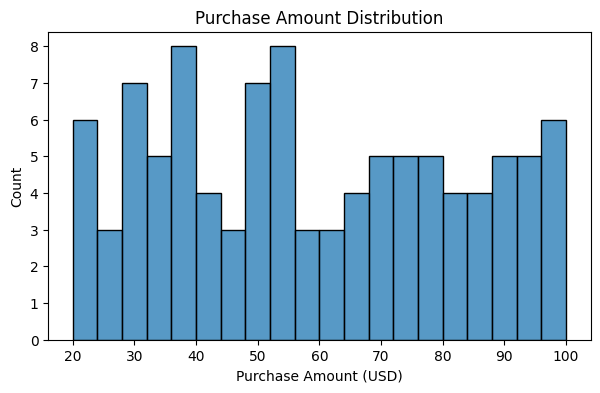

In [ ]:
#Purchase Amount Distribution histogram

plt.figure(figsize=(7,4))
sns.histplot(data['Purchase Amount (USD)'], bins=20)
plt.title("Purchase Amount Distribution")
plt.show()

- customer usually bought affordable items under 50 dollars

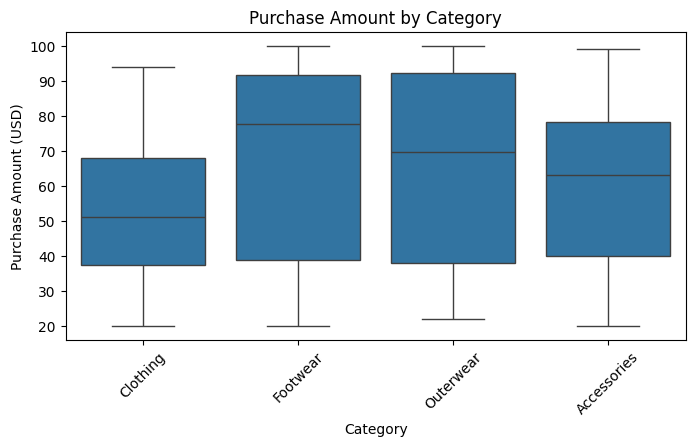

In [ ]:
#Purchase Amount vs Category box plot

plt.figure(figsize=(8,4))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=data)
plt.xticks(rotation=45)
plt.title("Purchase Amount by Category")
plt.show()


- Most purchased items are footwear and outerwear
- least is clothing

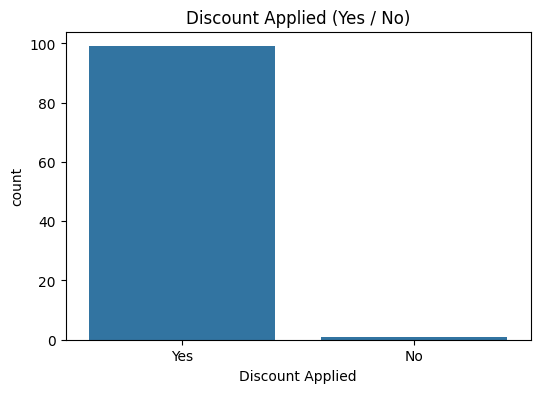

In [ ]:
#Discount Applied bar chart

plt.figure(figsize=(6,4))
sns.countplot(x=data['Discount Applied'])
plt.title("Discount Applied (Yes / No)")
plt.show()


- most purchases are usually with dicount applied.

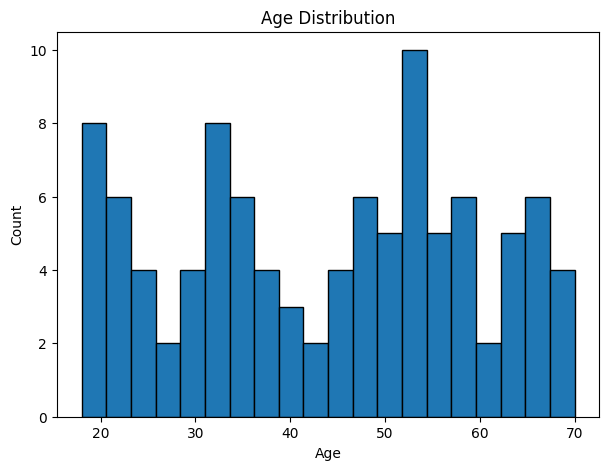

In [ ]:
#Age Distribution bar chart

plt.figure(figsize=(7,5))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- 50-53 years, this bin has the highest frequency in the histogram

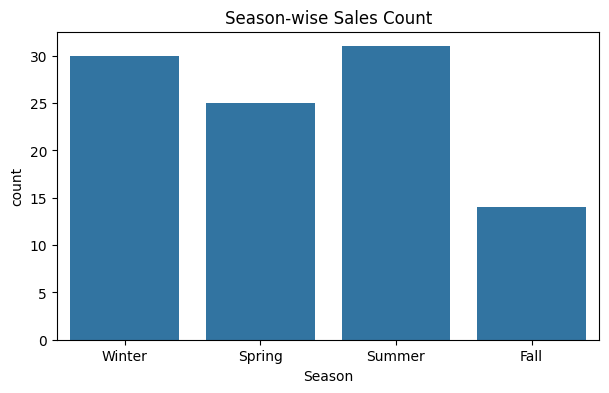

In [ ]:
# Season-wise Sales Count bar chart

plt.figure(figsize=(7,4))
sns.countplot(x=data['Season'])
plt.title("Season-wise Sales Count")
plt.show()


- Summer season shows highest sale

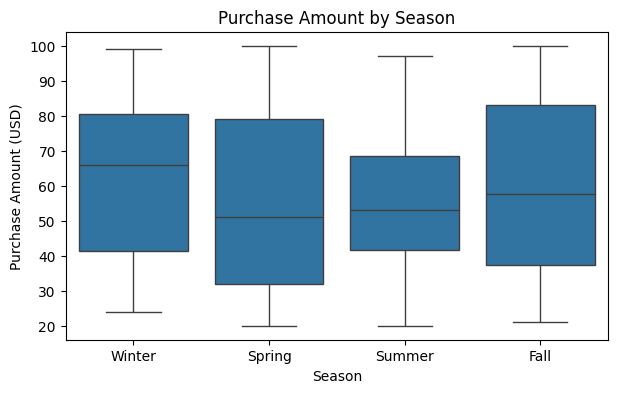

In [ ]:
#Purchase Amount vs Season box plot

plt.figure(figsize=(7,4))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=data)
plt.title("Purchase Amount by Season")
plt.show()


- Winter shows the highest purchase amounts on average, while Summer has the lowest spending.

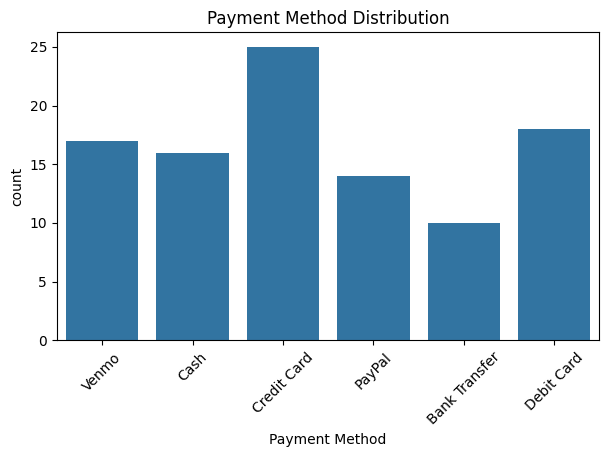

In [ ]:
# Payment Method Usage bar chart

plt.figure(figsize=(7,4))
sns.countplot(x=data['Payment Method'])
plt.xticks(rotation=45)
plt.title("Payment Method Distribution")
plt.show()


- Most common payment method is credit card.

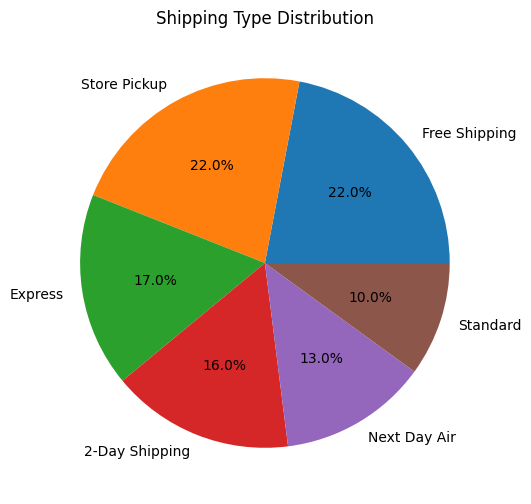

In [ ]:
# Shipping Type pie chart

plt.figure(figsize=(6,6))
data['Shipping Type'].value_counts().plot.pie( autopct='%1.1f%%')
plt.title("Shipping Type Distribution")
plt.ylabel("")
plt.show()


- Fast delivery or Free delivery is preferred by many customers.

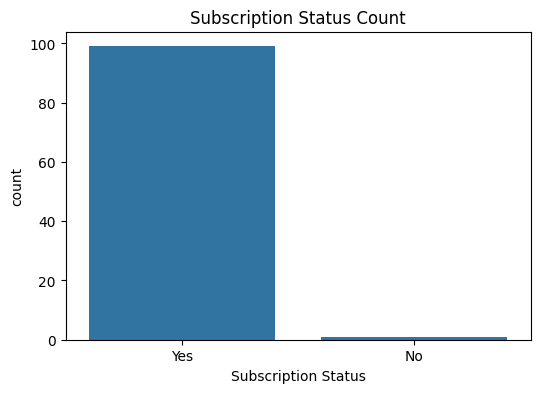

In [ ]:
#Subscription Status bar chart

plt.figure(figsize=(6,4))
sns.countplot(x=data['Subscription Status'])
plt.title("Subscription Status Count")
plt.show()


- Subscription rate is extremely high

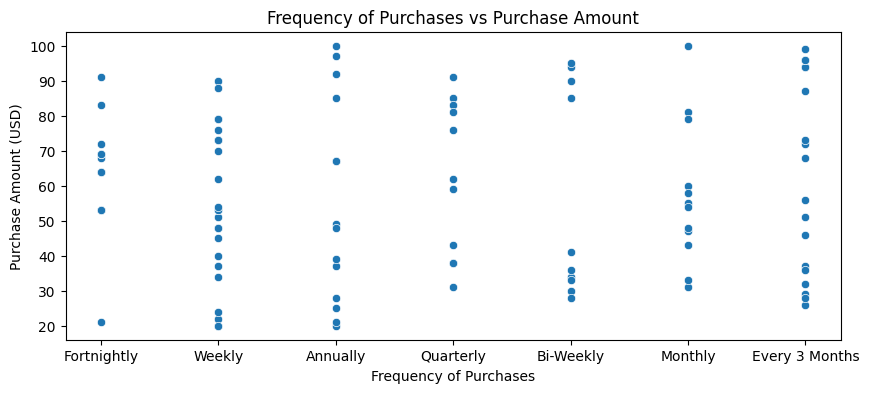

In [ ]:
#Frequency of Purchases vs Purchase Amount Scatter plot

plt.figure(figsize=(10,4))
sns.scatterplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=data)
plt.title("Frequency of Purchases vs Purchase Amount")
plt.show()


- Purchase amount does not depend on purchase frequency.

However, certain groups (Monthly, Bi-Weekly, Every 3 Months) show higher peaks, meaning they may be most valuable customer segments.

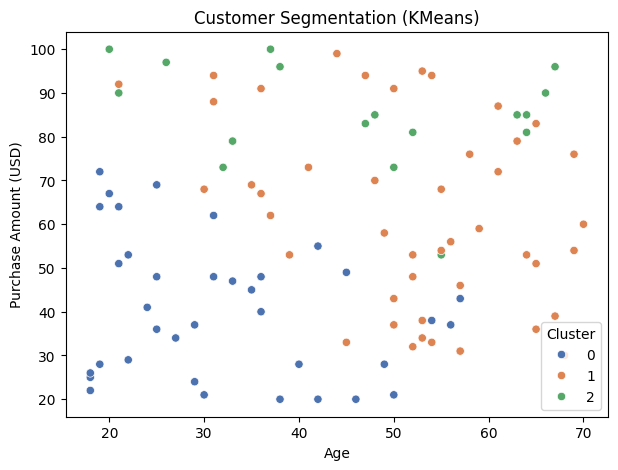

In [ ]:
#KMeans Segmentation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = data[['Age', 'Purchase Amount (USD)', 'Review Rating']]

scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=data['Age'],
    y=data['Purchase Amount (USD)'],
    hue=data['Cluster'],
    palette='deep'
)
plt.title("Customer Segmentation (KMeans)")
plt.show()


- Cluster 0 — Young & Low Spenders

Mostly customers aged 20–40
Purchase Amount is generally 20–50 USD

- Cluster 1 — Middle-Aged & High Spenders

Ages 35–70, very wide range
Purchase amounts mostly 50–100 USD, lots of high-value buyers

- Cluster 2 — Mixed Age but Very High Spenders

Age range 30–65
Many points in the 80–100+ USD spending range

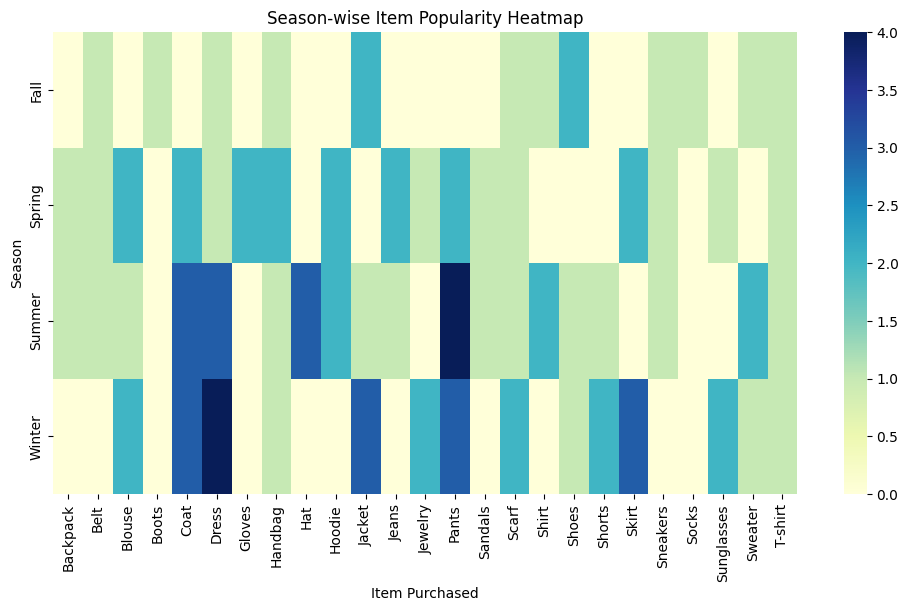

In [ ]:
# Season wise item popularity heatmap

pivot = pd.pivot_table(data, index='Season', columns='Item Purchased', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Season-wise Item Popularity Heatmap")
plt.xlabel("Item Purchased")
plt.ylabel("Season")
plt.show()


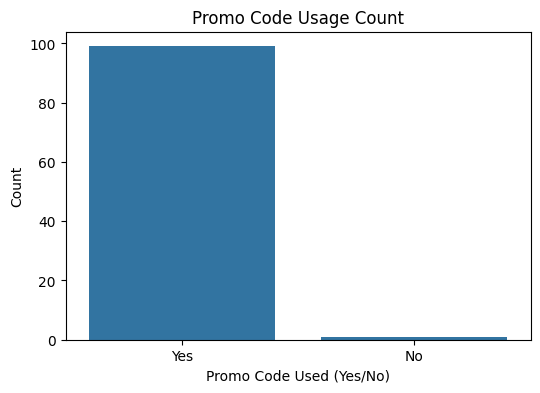

In [ ]:
# promo code usage count bar chart

plt.figure(figsize=(6,4))
sns.countplot(x=data['Promo Code Used'])
plt.title("Promo Code Usage Count")
plt.xlabel("Promo Code Used (Yes/No)")
plt.ylabel("Count")
plt.show()

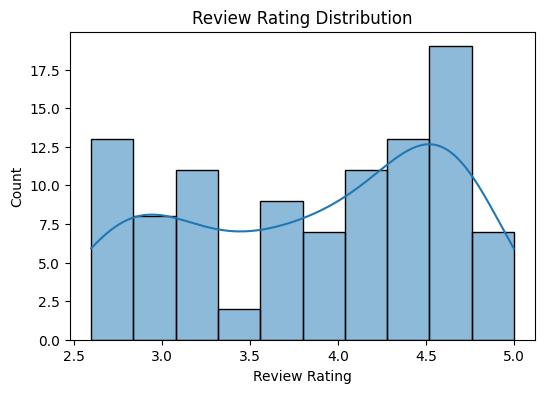

In [ ]:
# review rating distribution

plt.figure(figsize=(6,4))
sns.histplot(data['Review Rating'], bins=10, kde=True)
plt.title("Review Rating Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

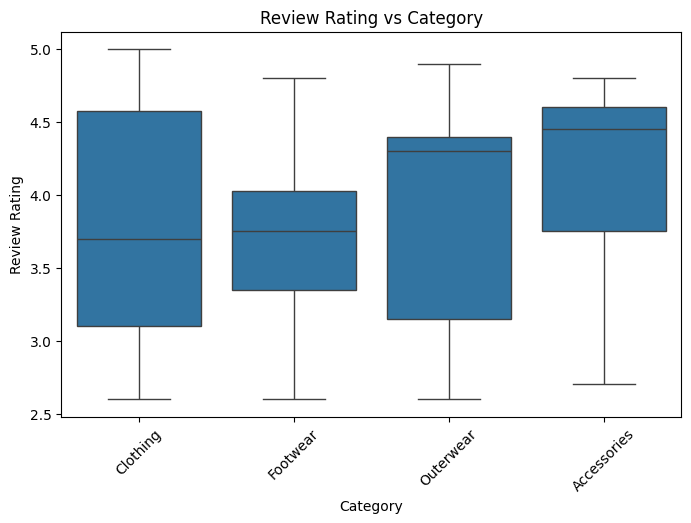

In [ ]:
#review rating vs category boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Review Rating', data=data)
plt.title("Review Rating vs Category")
plt.xticks(rotation=45)
plt.show()


Accessories & Outerwear have the highest typical ratings